In [ ]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import jupyter_black

jupyter_black.load(line_length=120)
folder = "data/single_thread"
folder = "data/multithread"

csv_files = sorted([f for f in os.listdir(folder) if f.endswith(".csv")])
json_files = sorted([f for f in os.listdir(folder) if f.endswith(".json")])
dfs = [pd.read_csv(os.path.join(folder, f)) for f in csv_files]
json_dicts = [json.load(open(os.path.join(folder, f))) for f in json_files]

Expected frame gap (ms): 8.5470
Actual mean frame gap (ms): 11.7075
Difference (ms): 3.1605


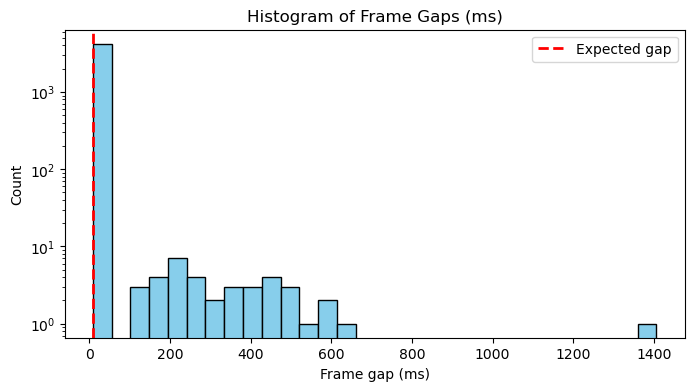

Expected frame gap (ms): 8.5470
Actual mean frame gap (ms): 11.8293
Difference (ms): 3.2823


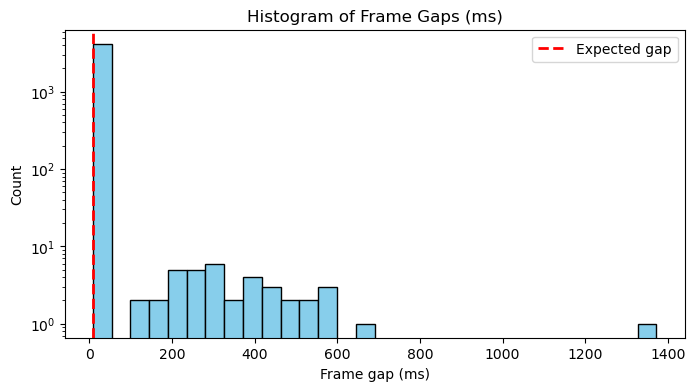

Expected frame gap (ms): 8.5470
Actual mean frame gap (ms): 11.4344
Difference (ms): 2.8874


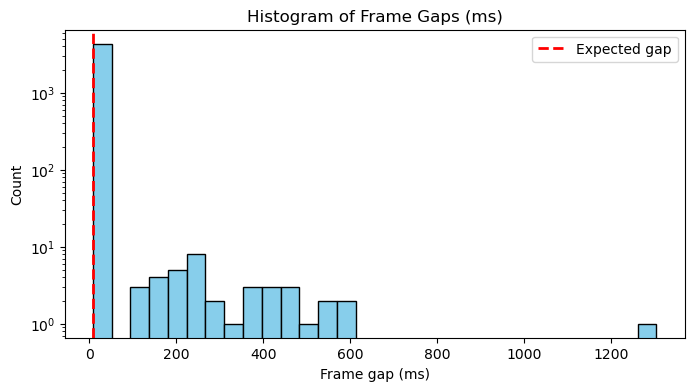

Expected frame gap (ms): 8.5470
Actual mean frame gap (ms): 11.0063
Difference (ms): 2.4593


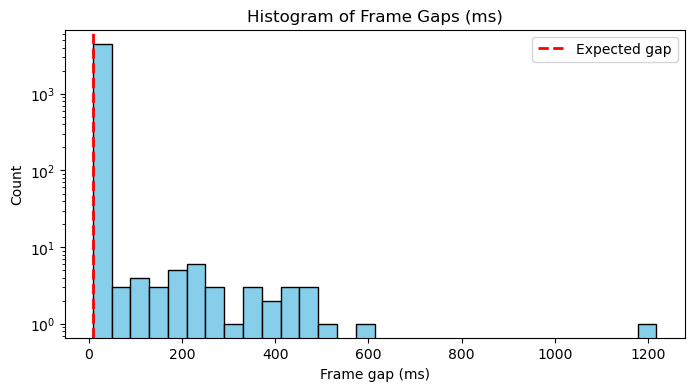

Expected frame gap (ms): 8.4746
Actual mean frame gap (ms): 11.1506
Difference (ms): 2.6761


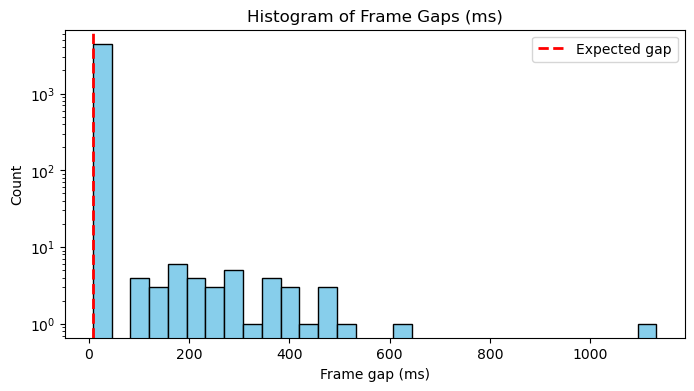

Expected frame gap (ms): 8.4746
Actual mean frame gap (ms): 10.9372
Difference (ms): 2.4627


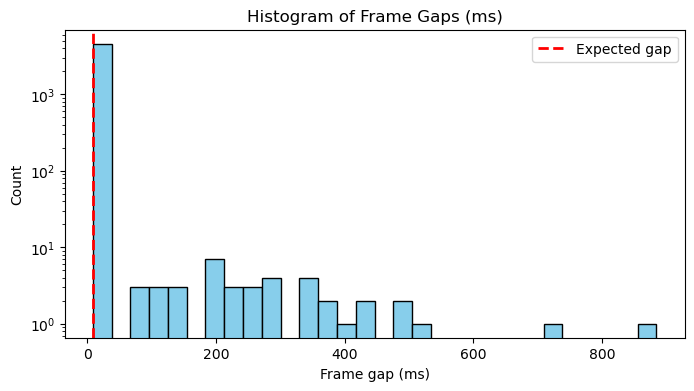

Expected frame gap (ms): 8.4746
Actual mean frame gap (ms): 10.7746
Difference (ms): 2.3000


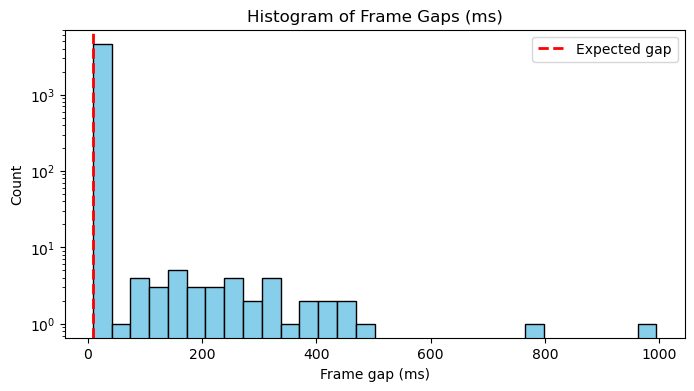

In [39]:
for df, dictionary in zip(dfs, json_dicts):
    # Get the timestamps
    timestamps = df["Timestamps"]
    timestamps_dt = pd.to_datetime(timestamps, unit="ns")
    FPS = dictionary["FPS"]

    # Calculate the time difference between consecutive frames in nanoseconds
    frame_gaps_ns = timestamps.diff().iloc[1:]

    # Convert the gaps to milliseconds for easier interpretation
    frame_gaps_ms = frame_gaps_ns / 1e6

    frame_gaps_ms.head()

    # Compare this with the FPS in ms
    expected_gap_ms = 1000 / FPS  # milliseconds per frame at given FPS

    print(f"Expected frame gap (ms): {expected_gap_ms:.4f}")
    print(f"Actual mean frame gap (ms): {frame_gaps_ms.mean():.4f}")
    print(f"Difference (ms): {frame_gaps_ms.mean() - expected_gap_ms:.4f}")

    plt.figure(figsize=(8, 4))
    plt.hist(frame_gaps_ms, bins=30, color="skyblue", edgecolor="black")
    plt.xlabel("Frame gap (ms)")
    plt.ylabel("Count")
    plt.title("Histogram of Frame Gaps (ms)")
    plt.axvline(expected_gap_ms, color="red", linestyle="dashed", linewidth=2, label="Expected gap")
    plt.yscale("log")
    plt.legend()
    plt.show()